In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/Pyhton/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df= df.replace(['?'], np.nan)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().mean()*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [8]:
# Doing univariate analysis
for i in df.columns:
    print(df[i].value_counts())

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: count, Length: 21648, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
education.num
9     10501

# Finding and tackling null values

In [9]:
# Obtain columns with null values

cols = [var for var in df.columns if df[var].isnull().mean()*100 <6 and df[var].isnull().mean()*100>0 ]
cols

['workclass', 'occupation', 'native.country']

In [10]:
# Understand what % of data set will remain after performing cca(complete case analysis)
len(df[cols].dropna())/len(df)  

0.9263229016307853

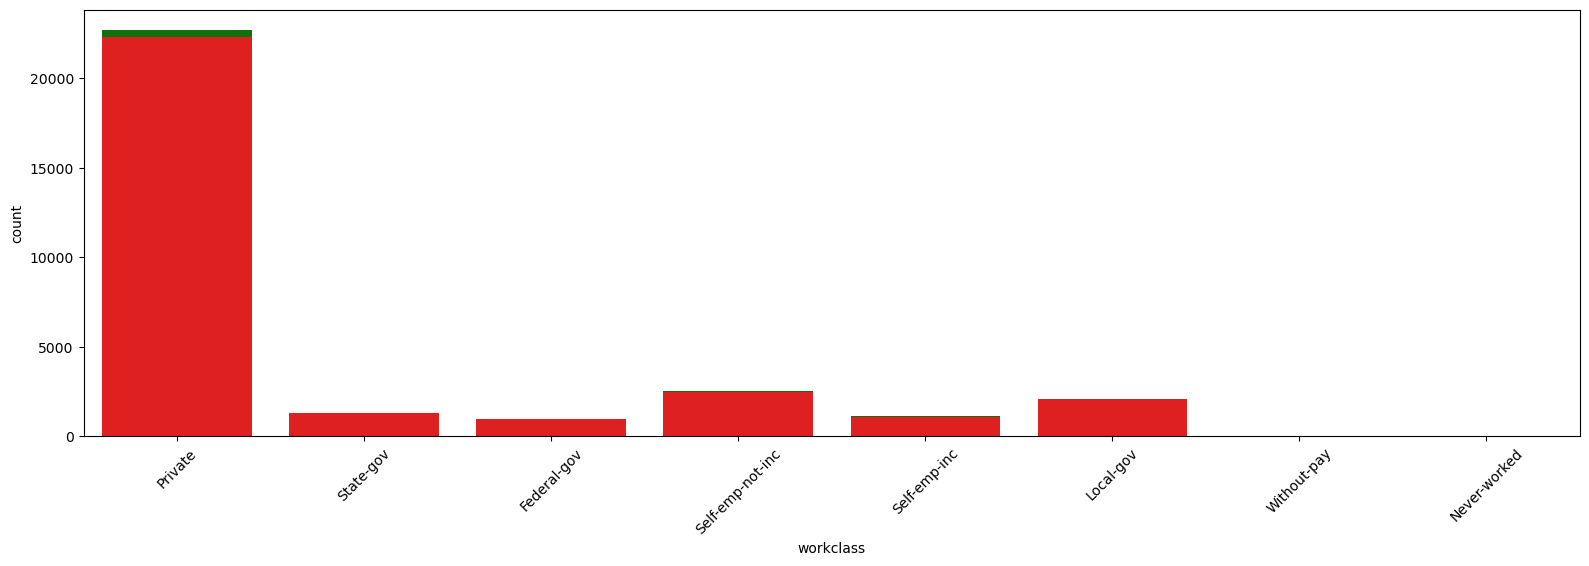

                  original       cca
workclass                           
Private           0.697030  0.738877
Self-emp-not-inc  0.078038  0.082853
Local-gov         0.064279  0.068530
State-gov         0.039864  0.042404
Self-emp-inc      0.034274  0.035608
Federal-gov       0.029483  0.031265
Without-pay       0.000430  0.000464
Never-worked      0.000215       NaN


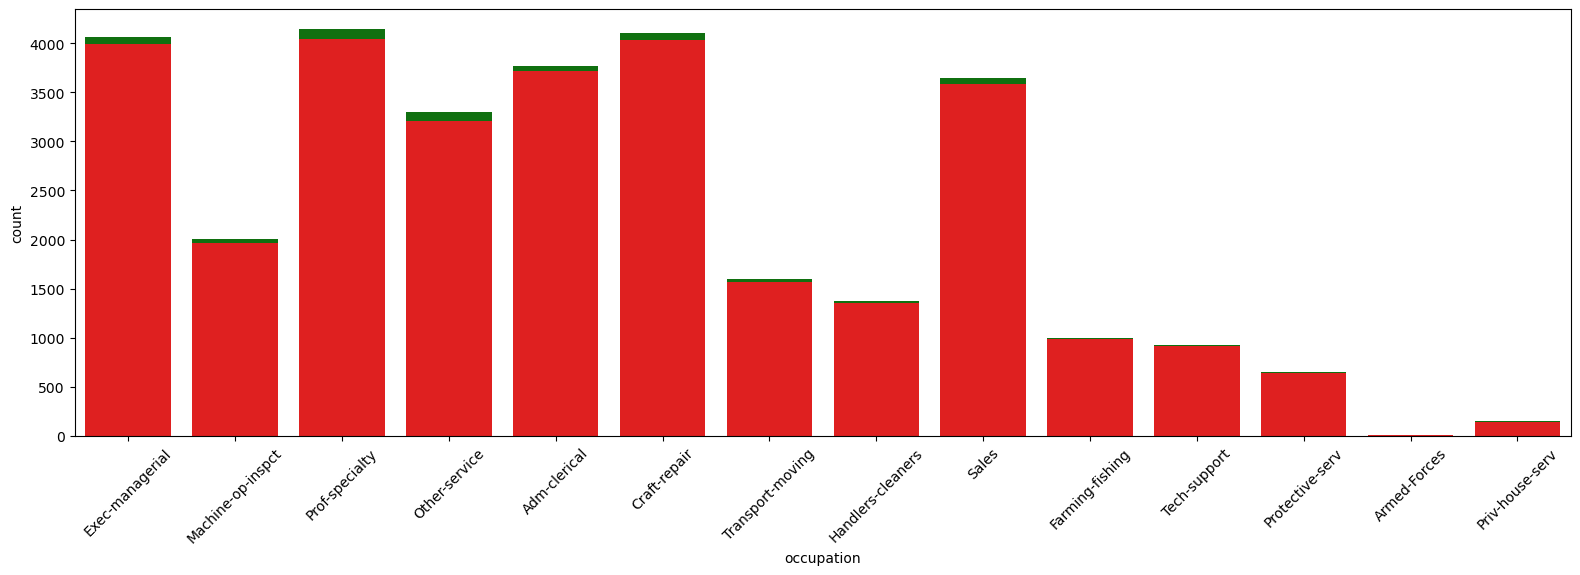

                   original       cca
occupation                           
Prof-specialty     0.127146  0.133877
Craft-repair       0.125887  0.133612
Exec-managerial    0.124873  0.132352
Adm-clerical       0.115783  0.123367
Sales              0.112097  0.118825
Other-service      0.101195  0.106492
Machine-op-inspct  0.061485  0.065181
Transport-moving   0.049046  0.052119
Handlers-cleaners  0.042075  0.044758
Farming-fishing    0.030527  0.032790
Tech-support       0.028500  0.030237
Protective-serv    0.019932  0.021351
Priv-house-serv    0.004576  0.004741
Armed-Forces       0.000276  0.000298


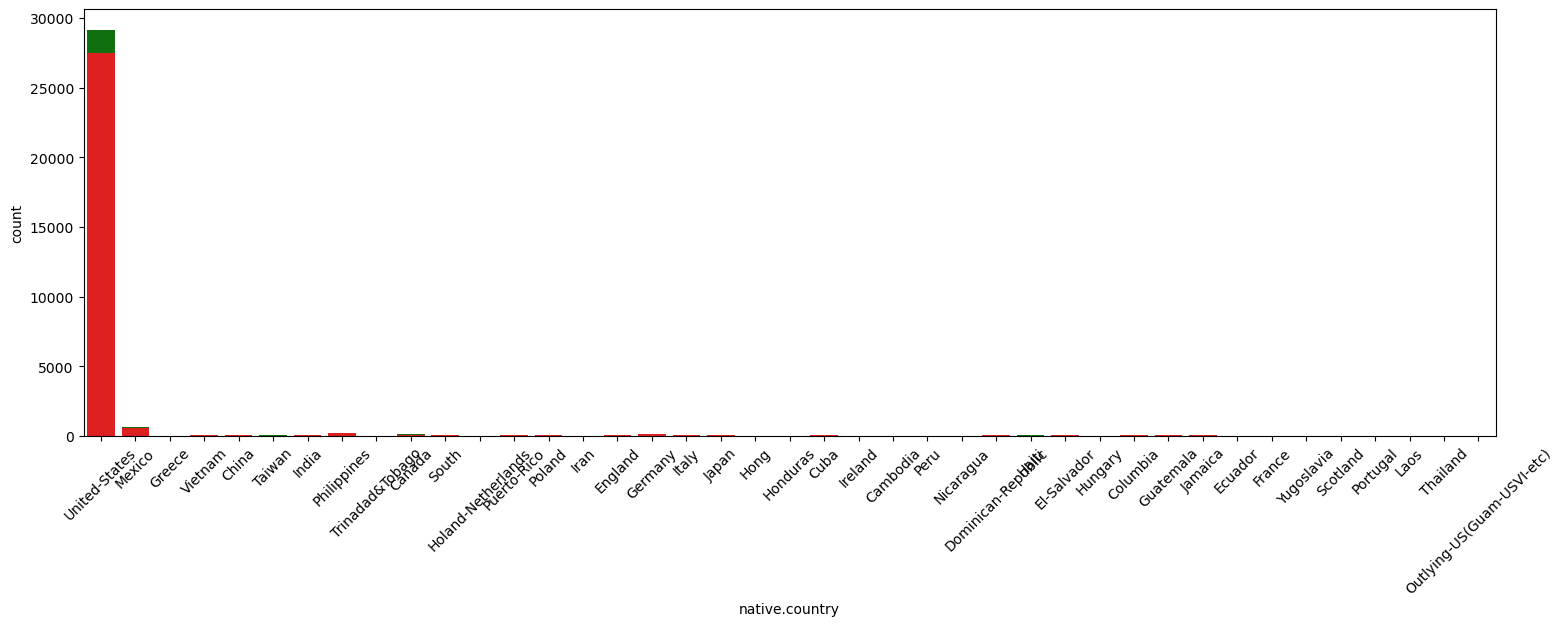

                            original       cca
native.country                                
United-States               0.895857  0.911876
Mexico                      0.019748  0.020224
Philippines                 0.006081  0.006233
Germany                     0.004207  0.004244
Canada                      0.003716  0.003548
Puerto-Rico                 0.003501  0.003614
El-Salvador                 0.003255  0.003315
India                       0.003071  0.003315
Cuba                        0.002918  0.003050
England                     0.002764  0.002851
Jamaica                     0.002488  0.002652
South                       0.002457  0.002354
China                       0.002303  0.002254
Italy                       0.002242  0.002254
Dominican-Republic          0.002150  0.002221
Vietnam                     0.002058  0.002122
Guatemala                   0.001966  0.002089
Japan                       0.001904  0.001956
Poland                      0.001843  0.001857
Columbia     

In [11]:
# Performinng cca and checking its efficiency
df_new_cca = df.dropna()
for i in cols:
    plt.figure(figsize = (16,5))
    sns.countplot(data = df, x = i, color = 'green')
    sns.countplot(data = df_new_cca, x = i,color = 'red')
    plt.tight_layout()
    plt.xticks(rotation= 45)
    plt.show()
    ratio_change = pd.concat([                                                                   
		  (df[i].value_counts()/len(df)),
		  (df_new_cca[i].value_counts()/len(df_new_cca))
		],	
		axis = 1,keys = ['original','cca'])
    print(ratio_change)

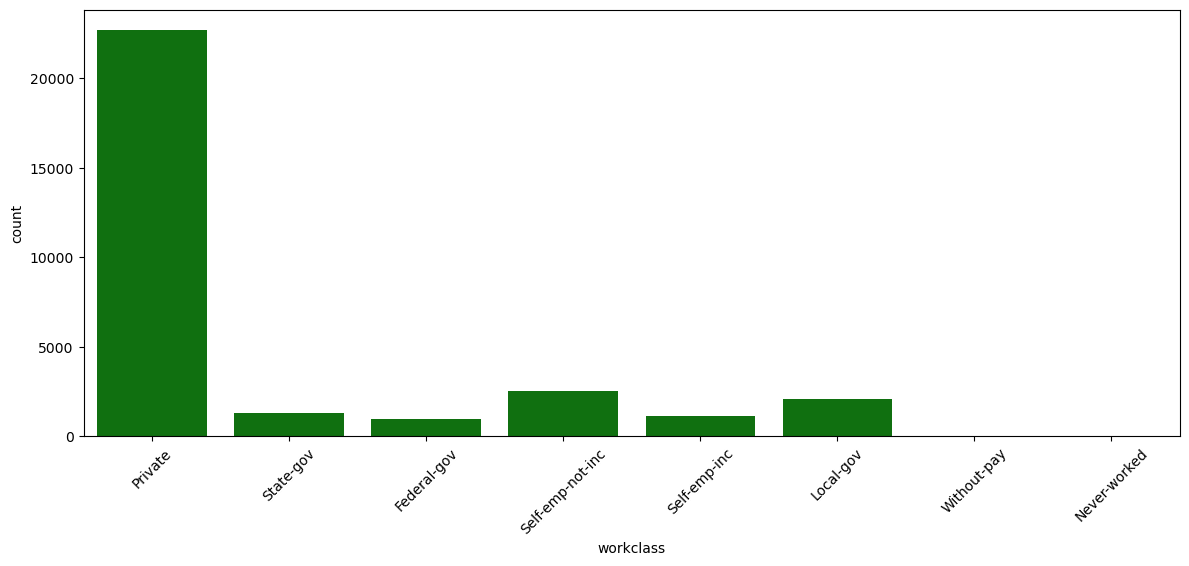

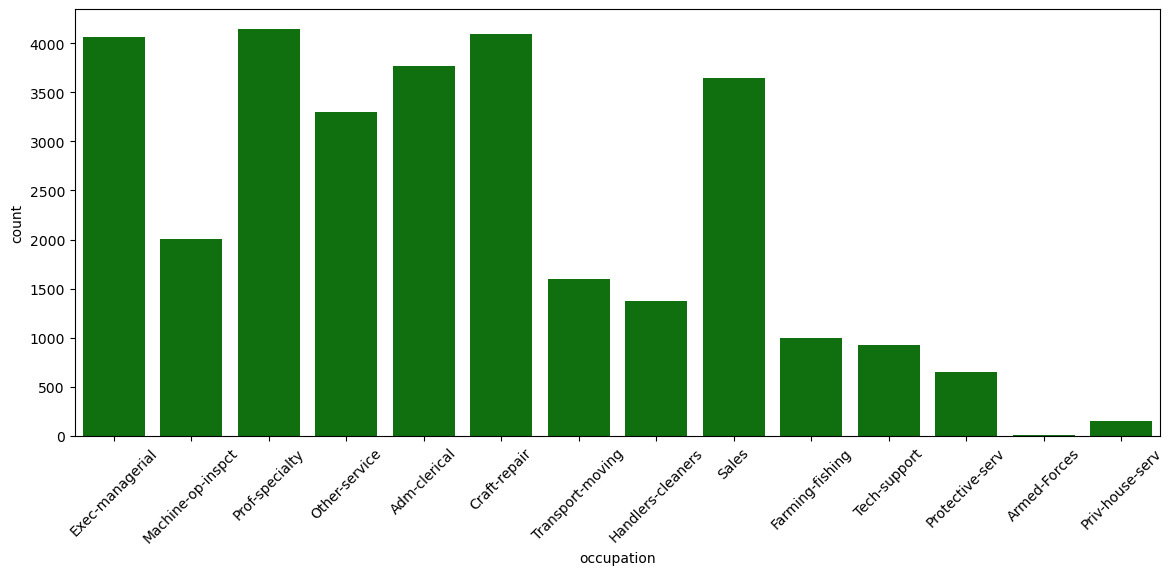

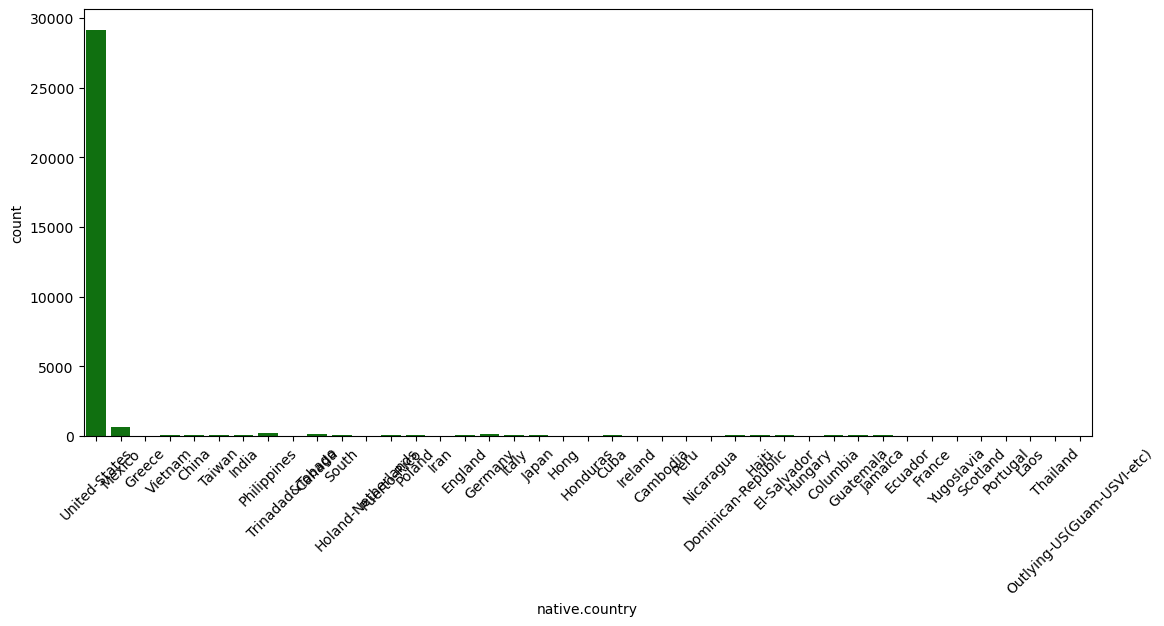

In [12]:
df_new_mode = df[cols].fillna(df[cols].mode())
df_new_mode

for i in cols:
    plt.figure(figsize = (12,5))
    sns.countplot(data = df, x = i, color= 'red')
    sns.countplot(data = df_new_mode, x = i, color = 'green')
    plt.tight_layout()
    plt.xticks(rotation= 45)
    plt.show()


In [13]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [14]:
# Remove rows where occupation is NaN
df.dropna(subset=['occupation'], inplace=True)

# Fill missing values in these columns with their mode
df['native.country'].fillna(df['native.country'].mode()[0], inplace=True)
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

df.reset_index(drop= True)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30714,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30715,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30716,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30718 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30718 non-null  int64 
 1   workclass       30718 non-null  object
 2   fnlwgt          30718 non-null  int64 
 3   education       30718 non-null  object
 4   education.num   30718 non-null  int64 
 5   marital.status  30718 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    30718 non-null  object
 8   race            30718 non-null  object
 9   sex             30718 non-null  object
 10  capital.gain    30718 non-null  int64 
 11  capital.loss    30718 non-null  int64 
 12  hours.per.week  30718 non-null  int64 
 13  native.country  30718 non-null  object
 14  income          30718 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [17]:
df.drop(['education','fnlwgt'],axis=1, inplace= True)

In [18]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,10.130314,1106.037079,88.910216,40.949313
std,13.118227,2.562469,7497.863364,405.657203,11.985382
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['income'],axis=1), df['income'], test_size = 0.2, random_state = 42)

In [20]:
X_test

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
16494,19,Private,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,45,United-States
22678,26,Private,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,52,United-States
14600,43,Private,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
10095,20,Private,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,Mexico
4346,46,Private,12,Divorced,Tech-support,Not-in-family,Black,Female,0,0,36,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
28345,38,Private,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
29945,49,Private,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States
23037,29,Private,10,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States
28394,30,Private,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States


In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24574, 12)
(6144, 12)
(24574,)
(6144,)


In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
le = LabelEncoder()
ohe = OneHotEncoder()
oe = OrdinalEncoder()

In [23]:
from sklearn.compose import ColumnTransformer
transformer =  ColumnTransformer(transformers=[('trans3',OneHotEncoder(sparse_output = False, drop = 'first'),['workclass','marital.status','occupation','relationship','race','sex','native.country'])
],remainder= 'passthrough').set_output(transform='pandas')

In [24]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [25]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [26]:
X_train

,trans3__workclass_Local-gov,trans3__workclass_Private,trans3__workclass_Self-emp-inc,trans3__workclass_Self-emp-not-inc,trans3__workclass_State-gov,trans3__workclass_Without-pay,trans3__marital.status_Married-AF-spouse,trans3__marital.status_Married-civ-spouse,trans3__marital.status_Married-spouse-absent,trans3__marital.status_Never-married,...,trans3__native.country_Thailand,trans3__native.country_Trinadad&Tobago,trans3__native.country_United-States,trans3__native.country_Vietnam,trans3__native.country_Yugoslavia,remainder__age,remainder__education.num,remainder__capital.gain,remainder__capital.loss,remainder__hours.per.week
22683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,50,14,0,0,50
29651,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31,9,0,0,65
23409,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,35,9,0,0,40
29823,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31,9,0,0,40
337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,58,14,0,1980,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31573,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,23,10,0,0,20
5663,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,62,4,0,0,40
887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23,14,0,1887,50
16711,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,64,13,0,0,45


In [27]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.model_selection import cross_val_score

In [33]:
models  ={'lor': LogisticRegression(),
          'dtc': DecisionTreeClassifier(),
          'nb' : GaussianNB(),
          'svm' : SVC(),
         'xgbc': XGBRFClassifier()
}

In [37]:
from sklearn.metrics import accuracy_score
results = []
cv_result =[]
for name,model in models.items():
   model.fit(X_train,y_train)
   y_pred=model.predict(X_test)
   acc = accuracy_score(y_test,y_pred)
   results.append({
       'model' : name,
       'accuracy' : acc
   })
   acc = cross_val_score(model, X_train, y_train, cv=10).mean()
   cv_result.append({
       'model': name,
       'cross validation': acc
    })

In [41]:
df_A = pd.DataFrame(results).set_index('model')
df_B = pd.DataFrame(cv_result).set_index('model')
final_result = pd.concat([df_A, df_B],axis=1).sort_values(by='accuracy',ascending=False)
final_result

,accuracy,cross validation
model,,
xgbc,0.850098,0.849760
lor,0.828939,0.823024
nb,0.822591,0.819850
dtc,0.813314,0.811915
svm,0.792969,0.796980
